In [1]:
from qiskit import *
import numpy as np
import math
%matplotlib inline

In [2]:
qiskit.__qiskit_version__

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.17.0', 'qiskit-aqua': '0.9.5', 'qiskit': '0.31.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ
token = 'a60b945e66d6a6fc057a0a9a4bab3d5361cccd28f2a57f34d7b65584cc2d8b3f6c5de57a105b7f2721b5ca5abc32a0075e97e3f42e06276c294fc0c6f141c7e7'
IBMQ.save_account(token,overwrite=True)

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
def AddOperationToCircuit(Line,Circuit,QRegs,CRegs):
    operation = Line[0]
    fargs = []
    args = []
    for arg in range(1,len(Line)):
        fargs.append(float(Line[arg]))
        args.append(math.floor(float(Line[arg])))
    if operation == "U3":
        Circuit.u(fargs[1],fargs[2],fargs[3],QRegs[args[0]])
    elif operation == "CU3":
        Circuit.cu(fargs[2],fargs[3],fargs[4],0.0,QRegs[args[0]],QRegs[args[1]])
    elif operation == "SWAP":
        Circuit.swap(QRegs[args[0]],QRegs[args[1]])
    elif operation == "CSWAP":
        Circuit.cswap(QRegs[args[0]],QRegs[args[1]],QRegs[args[2]])
    
    elif operation == "NOT":
        Circuit.x(QRegs[args[0]])
    elif operation == "CNOT":
        Circuit.cx(QRegs[args[0]],QRegs[args[1]])
    elif operation == "CCNOT":
        Circuit.ccx(QRegs[args[0]],QRegs[args[1]],QRegs[args[2]])
    elif operation == "Measure":
        Circuit.measure(QRegs[args[0]],CRegs[args[0]])

In [6]:
def ReadCompiledCircuit(FileName):
    file = open(FileName,'r')
    qBitNum = file.read(2)[0]
    qBitNum = int(qBitNum)
    print(str(qBitNum)+" Qbits")
    quantumRegisters = QuantumRegister(qBitNum)
    classicalRegisters = ClassicalRegister(qBitNum)
    compiledCircuit = QuantumCircuit(quantumRegisters,classicalRegisters)
    for line in file:
        lineArray = line.split()
        AddOperationToCircuit\
        (lineArray,compiledCircuit,quantumRegisters,classicalRegisters)
    return compiledCircuit
        
nShots = 8192

4 Qbits


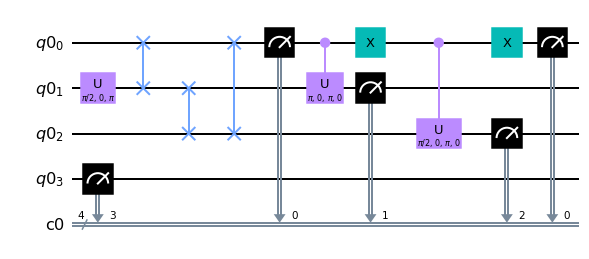

In [7]:
QCircuit = ReadCompiledCircuit('circuit.txt')
QCircuit.draw(output = 'mpl')

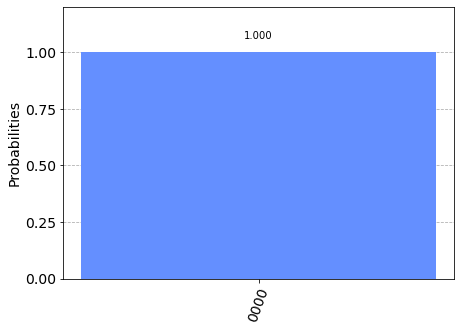

In [8]:
#Usar simulador
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(QCircuit,nShots)
result = job.result()
plot_histogram(result.get_counts(QCircuit))

In [ ]:
#Usar provider
#provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
provider = IBMQ.get_provider('ibm-q')
qcomputer = provider.get_backend('ibmq_belem')
job = execute(QCircuit, backend = qcomputer, shots = nShots)
result = job.result()
plot_histogram(result.get_counts(QCircuit))